<img src="https://www.wellcomeconnectingscience.org/wp-content/themes/new_wellcome_connecting_science/dist/assets/svg/logo.svg" alt="WCS Logo" width="150" style="float: left;">
<img src="https://github.com/EveliaCoss/Tutorial_ISCB_LATAM_scATACseq/blob/main/Logo_JAGUAR.png?raw=true" alt="WCS Logo" width="150" style="float: right;">





<h1><center>
  Practical 5: Theory and practice of the CITE-seq technology
  </center>

## About the course 📌

This course is part of the Workshop [Single Cell Genomic Approaches to Study the Immune System - Latin America & the Caribbean](https://coursesandconferences.wellcomeconnectingscience.org/event/single-cell-genomic-approaches-to-study-the-immune-system-latin-america-the-caribbean-20241109/) (9-11 Novembrer 2024), Universidad CES, Medellín, Colombia.

- **Date:** 10 November 2024
- **Course duration**: 2 hours

**Speakers:**
- <font color='orange'>Danilo Ceschin</font> - PI, Centro de Investigación en Medicina Tralaslacional “Severo R. Amuchástegui” (CIMETSA), Instituto Universitario de Ciencias Biomédicas de Córdoba, Argentina.
- <font color='orange'>Felipe Gajardo</font> - PostDoc, Laboratory of Epigenetics, Pontificia Universidad Catolica de Chile.

**Abstract:**
CITE-Seq (Cellular Indexing of Transcriptomes and Epitopes by sequencing) is an advanced technique that merges single-cell RNA sequencing (scRNA-seq) with protein marker detection, enabling comprehensive profiling of individual cells at both the transcriptomic and proteomic levels. By attaching unique oligonucleotide barcodes to antibodies that bind specific cell surface proteins, CITE-Seq allows for simultaneous measurement of gene expression and protein abundance in thousands of single cells. This dual-modality approach offers deeper insights into cellular heterogeneity, states, and functions compared to traditional methods. CITE-Seq has proven invaluable in various fields, including immunology, oncology, and developmental biology, providing a powerful tool for deciphering complex biological systems and advancing precision medicine. This technique's ability to integrate RNA and protein data from the same cells presents new opportunities for biomarker discovery, disease characterization, and therapeutic development.

**Learning objectives:**
1.   **Understand CITE-Seq Principles:** Grasp the basic concepts and advantages of CITE-Seq technology.
2.   **Master Experimental Workflow:** Learn the step-by-step process of conducting a CITE-Seq experiment.
3. **Analyze CITE-Seq Data:** Develop skills in bioinformatics tools for processing and analyzing CITE-Seq data.
4. **Interpret CITE-Seq Results:** Interpret and draw insights from CITE-Seq data to identify cell populations and states.
5. **Apply CITE-Seq to Research:** Design and apply CITE-Seq experiments to address specific research questions.

If you want to come back to the Github, please follow the next link:
*   Github: https://github.com/WCSCourses/Single_Cell_Genomics_ImmuneSys_24


<center>

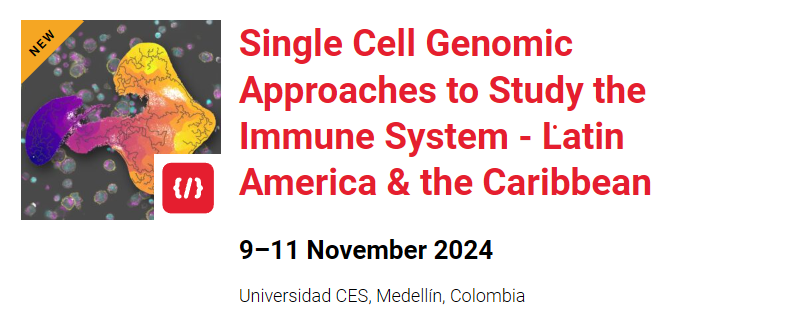

</center>

# **Practical 5: The basic structure of a multimodal Seurat Object**

# **Setting Up the Environment in Google Colab** 💻

## Step 1: Custom Shell Call Function for Google Colab
Google Colab typically runs Python as the default environment. This function lets you run shell commands from within R, ensuring compatibility with Colab’s infrastructure. It captures and prints the output of the shell commands. This functionality is useful when managing system configurations or installing packages in Colab while using the R kernel.



In [ ]:
## https://stackoverflow.com/questions/70025153/how-to-access-the-shell-in-google-colab-when-running-the-r-kernel
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

## Step 2: Downloads and sets up the R2U
In this section, the script downloads and sets up the R2U repository for package management. R2U is a fast way to install R packages on Ubuntu (the operating system underlying Google Colab). This makes package installation quicker and more efficient. The script sets the appropriate permissions for the downloaded shell script, runs it, and then enables the bspm package for managing packages. After installation, the script is removed.

This is an important step to streamline package installations, reducing the time needed for installing necessary libraries for CITE-Seq data analysis, and ensuring that your environment is properly configured for your workflow.

In [ ]:
## Setup R2U
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")


51 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
ca-certificates is already the newest version (20240203~22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6pBh5No

Tracing function "install.packages" in package "utils"



## Step 3: Install and Load Required Packages
This function is essential for setting up your CITE-Seq analysis environment in R. It ensures that all required packages are installed and loaded, which is crucial when working with multiple packages for data visualization, statistical analysis, or single-cell analysis in CITE-Seq.

For this tutorial, we will need the `Seurat` package that will help us download, load and analyse the data in R. Using the following code you should be able to install:

+ `Seurat`, the swiss-knife toolkit for analysing single-cell data in R.

In [ ]:
loadAndInstallPackages <- function(pkgs) {
  # Function to load packages with suppressed warnings and messages
  myrequire <- function(pkg) {
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(pkg, character.only = TRUE))))
  }

  # Check which packages are not installed
  new.pkgs <- pkgs[!(pkgs %in% installed.packages()[, "Package"])]

  # Install missing packages
  if (length(new.pkgs) > 0) {
    message("Installing the following packages: ", paste(new.pkgs, collapse = ", "))
    if (!requireNamespace("BiocManager", quietly = TRUE))
      install.packages("BiocManager")
    BiocManager::install(new.pkgs, dependencies = TRUE)
  }

  # Load all packages, including newly installed ones
  ok <- sapply(pkgs, myrequire)

  # Report if any package could not be loaded
  if (!all(ok)) {
    message("The following packages could not be loaded: ", paste(pkgs[!ok], collapse = ", "))
  } else {
    message("All packages were successfully loaded.")
  }
}

packages <- c("Seurat")

# installation and/or calling packages
loadAndInstallPackages(packages)

Installing the following packages: Seurat

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'Seurat'

Old packages: 'curl'



# 1️⃣ **Download and Uncompress CITE-Seq Count**


Matrices
The count matrices contain the core data for single-cell multimodal analysis, including RNA and protein expression levels. Accessing this data is the foundational step for conducting subsequent analyses, such as exploring gene expression patterns or protein marker abundance across different cell types.

In [ ]:
# Download and uncompress count matrices
system("wget https://github.com/WCSCourses/Single_Cell_Genomics_ImmuneSys_24/raw/refs/heads/main/course_data/Module2_CITEseq/10X_multimodal_dataset_downsample3000.tar.gz")
system("tar xf 10X_multimodal_dataset_downsample3000.tar.gz")

# 2️⃣ **Load Gene Expression and Antibody-Derived Tag (ADT) Data**
Load Data from the multimodal single-cell analysis. It allows us to work with two different types of molecular data—gene expression and protein expression—simultaneously. The combination of these datasets helps in gaining a more comprehensive understanding of cellular states, as the protein data often complements the RNA expression profile, especially in identifying cell types and subtypes.


In [ ]:
gex_data <- Read10X(data.dir = './YASCP_downsample_3000_MEX_GEX/',
                    unique.features = T,
                    strip.suffix = T)

adt_data <- Read10X(data.dir = './YASCP_downsample_3000_MEX_ADT/',
                    unique.features = T,
                    strip.suffix = T)

In [ ]:
# Note that since measurements were made in the same cells, the two matrices have identical
# column names
#checks if the cell barcodes in gex_data and adt_data match, ensuring both datasets are aligned for the same cells in multimodal analysis.
all.equal(colnames(gex_data), colnames(adt_data))

# 3️⃣ **Create Seurat object**
This creates a Seurat object using the gene expression data (`gex_data`). The `Assays(yascp)` command shows that the default assay stores RNA measurements.

In [ ]:
# creates a Seurat object based on the scRNA-seq data
yascp <- CreateSeuratObject(counts = gex_data)

# By default, the yascp object contains an assay storing RNA measurement
Assays(yascp)

# 4️⃣ **Integrating RNA and ADT Data into Seurat Object**
Integrating both RNA and ADT (Antibody-Derived Tag) data in a Seurat object. After creating a new assay for ADT, it is added to the Seurat object, allowing us to handle multimodal data for further analysis, such as exploring both gene expression and protein abundance in a unified framework.

In [ ]:
# create a new assay to store ADT information
adt_assay <- CreateAssay5Object(counts = adt_data)

# add this assay to the previously created Seurat object
yascp[["ADT"]] <- adt_assay

# Validate that the object now contains multiple assays
Assays(yascp)

# 5️⃣ **Exploring the Seurat Object**
We'll explore the structure of the Seurat object to understand what it contains. We'll look at the assays and view the gene and protein names.

In [ ]:
# display the row names (i.e., the feature names) from the ADT assay that has been added to the yascp Seurat object.
# These row names correspond to the protein markers (antibodies) measured in the CITE-Seq experiment.
rownames(yascp[["ADT"]])

In [ ]:
# Switch the default to ADT
DefaultAssay(yascp) <- "ADT"
DefaultAssay(yascp)

In [ ]:
# display the row names (i.e., the feature names) from the RNA assay that has been added to the yascp Seurat object.
# These row names correspond to the features measured in the CITE-Seq experiment.
rownames(yascp[["RNA"]])

In [ ]:
# Switch the default to ADT
DefaultAssay(yascp) <- "RNA"
DefaultAssay(yascp)

This step focuses on understanding the structure of the Seurat object. Let's check the available assays and metadata in the object.

In [ ]:
# Check assays
Assays(yascp)

# Access metadata
head(yascp@meta.data)


Accessing Data in the Seurat Object

In a multimodal Seurat object, each type of data is stored in different "assays". We'll show how to access data from the RNA and ADT assays using standard code to explore R objects. Note that the Seurat package has its own build-in functions to obtain assay information (e.i. `GetAssay` and `GetAssayData`).

In [ ]:
# Access RNA assay
DefaultAssay(yascp) <- "RNA"
colnames(yascp@assays$RNA$counts)

In [ ]:
# Access to the data
head(yascp@assays$RNA$counts)

In [ ]:
# Access ADT assay
DefaultAssay(yascp) <- "ADT"
colnames(yascp@assays$ADT$counts)

In [ ]:
# Access to the data
head(yascp@assays$ADT$counts)

Visualizing the Seurat Object Structure

Before proceeding with any analysis, it’s important to understand the underlying structure of the Seurat object. Let’s visualize the number of cells, genes, and assays present in the object.

In [ ]:
# Show dimensions of the RNA and ADT assays
cat("RNA dimensions: ", dim(yascp@assays$RNA$counts), "\n")
cat("ADT dimensions: ", dim(yascp@assays$ADT$counts), "\n")


# 6️⃣ **Data Normalization and Dimensionality Reduction**
This section applies a series of preprocessing steps on the Seurat object to prepare the single-cell RNA-seq data for analysis. The steps include normalizing the data, identifying variable features, scaling the data, performing Principal Component Analysis (PCA) for dimensionality reduction, and clustering the cells. Finally, UMAP is used for visualizing the clusters in two dimensions, which helps in understanding the cellular heterogeneity within the dataset. The DimPlot function displays the UMAP visualization with cluster labels.

Cluster cells on the basis of their scRNA-seq profiles The steps below represent a quick clustering of the PBMCs based on the scRNA-seq data.

In [ ]:
# Note that all operations below are performed on the RNA assay Set and verify that the
# default assay is RNA
DefaultAssay(yascp) <- "RNA"
DefaultAssay(yascp)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CD69, IFITM1, LTB, IL7R, CD7, IL32, LEF1, ZEB1, ZFP36L2, ITM2A 
	   RORA, CTSW, NOSIP, DNAJB1, NELL2, CCL5, ZNF331, CD8B, CST7, CD8A 
	   TENT5C, LINC02446, INPP4B, NKG7, KLRK1, GATA3, TRBC1, KLRB1, CD28, ICOS 
Negative:  IFI30, LYZ, FCN1, CST3, S100A9, SPI1, S100A8, G0S2, IL1B, LST1 
	   CSTA, TNFAIP2, CTSS, TYROBP, S100A11, NLRP3, SERPINA1, AIF1, NAMPT, FCER1G 
	   VCAN, PLAUR, ACSL1, CFD, S100A12, IFNGR2, LGALS3, HCK, PSAP, CD68 
PC_ 2 
Positive:  NKG7, CST7, GNLY, CTSW, CCL5, GZMB, GZMA, GZMH, FGFBP2, KLRD1 
	   PRF1, HOPX, MATK, KLRF1, SPON2, IFITM2, PFN1, S1PR5, KLRK1, IFITM1 
	   CD7, FCGR3A, KLRC2, S100A4, CLIC3, C12orf75, ITGB2, KLRB1, SRGN, PMAIP1 
Negative:  CD79A, MS4A1, BANK1, AFF3, LTB, RALGPS2, LINC00926, HLA-DRA, FCRL1, FCER2 
	   TNFRSF13C, COBLL1, RUBCNL, ADAM28, IGHM, HLA-DRB5, NIBAN3, HLA-DQB1, ZEB1, PLEKHG1 
	   CHPT1, HLA-DQA1, ARHGAP24, EBF1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3000
Number of edges: 108299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8533
Number of communities: 14
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:35:34 UMAP embedding parameters a = 0.9922 b = 1.112

15:35:34 Read 3000 rows and found 15 numeric columns

15:35:34 Using Annoy for neighbor search, n_neighbors = 30

15:35:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:35:35 Writing NN index file to temp file /tmp/RtmpFCnRvX/file21018107089

15:35:35 Searching Annoy index using 1 thread, search_k = 3000

15:35:36 Annoy recall = 100%

15:35:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

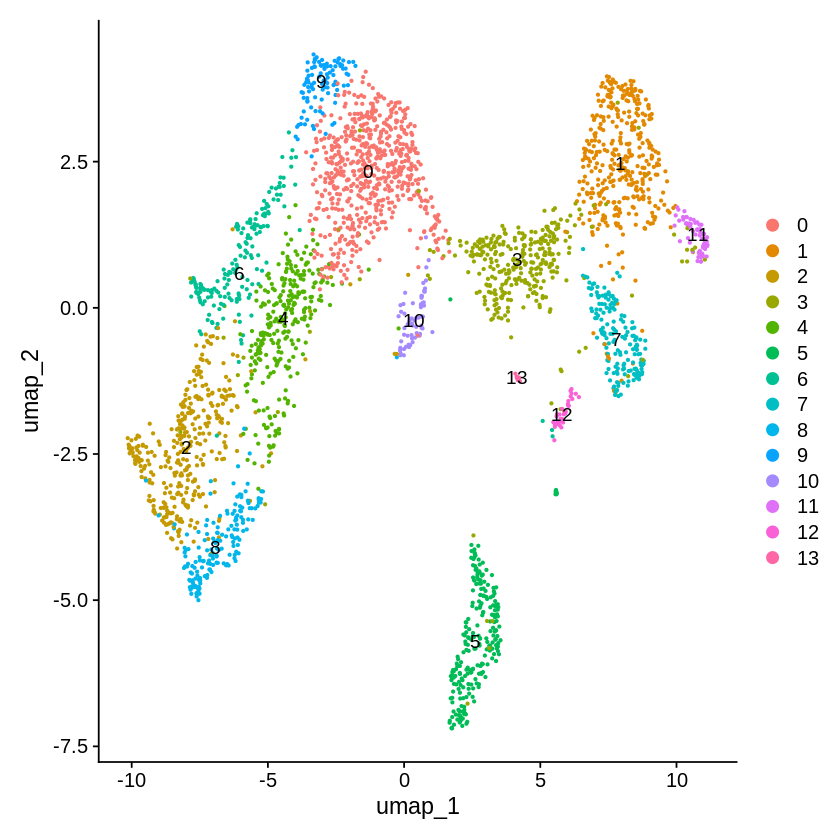

In [ ]:
# Normalize RNA data
yascp <- NormalizeData(yascp)

# Find highly variable features (genes)
yascp <- FindVariableFeatures(yascp)

# Scale the data
yascp <- ScaleData(yascp)

# Perform PCA for dimensional reduction
yascp <- RunPCA(yascp)

# Find neighbors and clusters
yascp <- FindNeighbors(yascp, dims = 1:15)
yascp <- FindClusters(yascp, resolution = 0.8)

# Run UMAP for visualization
yascp <- RunUMAP(yascp, dims = 1:15)
DimPlot(yascp, label = TRUE)


Additional Layers of the Seurat Object

We can access various layers like the normalized data, scaled data, and results from dimensionality reduction stored in the Seurat object.

In [ ]:
# Access normalized data
head(yascp@assays$RNA$data)

  [[ suppressing 3000 column names ‘AAACCTGAGTGTACCT’, ‘AAACCTGGTCCTCTTG’, ‘AAACCTGGTCTCTTTA’ ... ]]



6 x 3000 sparse Matrix of class "dgCMatrix"
                                                                             
AL627309.1 . . . . . . . . . . . . . . . . .        . . . . . . . . . . . . .
AL627309.5 . . . . . . . . . . . . . . . . .        . . . . . . . . . . . . .
LINC01409  . . . . . . . . . . . . . . . . 1.235015 . . . . . . . . . . . . .
FAM87B     . . . . . . . . . . . . . . . . .        . . . . . . . . . . . . .
LINC01128  . . . . . . . . . . . . . . . . .        . . . . . . . . . . . . .
LINC00115  . . . . . . . . . . . . . . . . .        . . . . . . . . . . . . .
                                                                              
AL627309.1 .         . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.5 .         . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
LINC01409  0.9687014 . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM87B     .         . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
LINC01128  .   

In [ ]:
# Access scaled data
head(yascp@assays$RNA$scale.data)

,AAACCTGAGTGTACCT,AAACCTGGTCCTCTTG,AAACCTGGTCTCTTTA,AAACCTGGTTGCCTCT,AAACCTGTCCAGGGCT,AAACCTGTCGCTGATA,AAACCTGTCTCATTCA,AAACCTGTCTGATACG,AAACGGGAGAGGGCTT,AAACGGGAGCGGATCA,⋯,TTTGGTTAGTTCCACA,TTTGGTTAGTTGTCGT,TTTGGTTCAATGGATA,TTTGGTTCAGGACCCT,TTTGGTTGTTGGACCC,TTTGGTTTCAACCAAC,TTTGGTTTCCCACTTG,TTTGTCAGTAGTGAAT,TTTGTCAGTCATACTG,TTTGTCATCCTAGTGA
HES4,4.85181208,-0.27899561,-0.27899561,-0.27899561,-0.27899561,-0.27899561,-0.27899561,-0.27899561,-0.27899561,-0.27899561,⋯,-0.27899561,-0.27899561,-0.27899561,1.62535865,-0.27899561,2.05968275,-0.27899561,-0.27899561,-0.27899561,1.85542793
ISG15,-0.37101370,-0.37101370,-0.37101370,-0.37101370,-0.37101370,-0.37101370,-0.37101370,-0.37101370,-0.37101370,-0.37101370,⋯,-0.37101370,-0.37101370,-0.37101370,-0.37101370,1.29516424,0.88174038,-0.37101370,1.34551139,-0.37101370,-0.37101370
TNFRSF18,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,⋯,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397,-0.12779397
AL162741.1,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,⋯,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168,-0.03646168
AL109917.1,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,⋯,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021,-0.02578021
ACOT7,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,⋯,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207,-0.12623207


In [ ]:
# Access PCA results
# Muestra las primeras filas de las embeddings de las celdas (coordenadas en los PC)
head(yascp@reductions$pca@cell.embeddings)


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
AAACCTGAGTGTACCT,2.2559043,16.1350774,6.5468125,4.3599144,3.3577439,-1.5669007,5.5186477,3.9931480,4.3059952,0.2181284,⋯,-1.5161155,-1.0983298,3.2362909,1.8051273,0.81792184,-1.0361962,-2.44858893,-2.687582,2.9746157,0.2777796
AAACCTGGTCCTCTTG,2.9875133,-2.4799777,-0.7922443,-3.0093791,0.8315309,2.3396248,-0.2237965,-1.9772793,3.8510067,1.0117121,⋯,0.4772833,-0.2143037,1.5643247,-0.5646500,0.04176053,0.3104589,-0.90168172,-1.312422,1.0972341,-1.2439739
AAACCTGGTCTCTTTA,-0.5742274,-2.5172715,3.3877828,0.6058912,1.1809952,-0.9094362,1.6032711,-0.3835857,3.6147927,0.7543903,⋯,-1.3711969,1.5435750,-2.0519366,-0.3530705,4.23333279,-0.8779326,0.01614782,2.837122,0.8430603,1.7530735
AAACCTGGTTGCCTCT,-17.1913319,0.2149705,-3.4954840,2.3924136,3.8048886,0.2325834,-3.3640358,3.4007137,-1.9089289,0.7319520,⋯,-0.8515454,0.7683963,-0.3589241,2.3479890,-2.43849250,0.8815388,1.77150675,1.437015,0.8502012,-0.2416833
AAACCTGTCCAGGGCT,5.4551193,10.9064876,3.5466133,1.4654941,2.2284955,0.7433931,-0.1023460,-2.8307222,-0.9558881,-2.7118272,⋯,-2.0991470,1.0051688,0.5760159,-0.6021819,1.67770693,0.1580595,0.43164789,0.632160,-0.5593634,0.3720536
AAACCTGTCGCTGATA,-23.5200698,0.2850013,-3.7440072,-0.1165634,0.2044491,-2.8043823,-2.6140701,-4.6250366,-3.0667784,4.8510833,⋯,2.8232781,0.4351596,-1.8555305,1.5737838,-1.09725415,-1.5186483,-0.73615492,1.621784,-0.2717668,1.2863014


In [ ]:
# Access UMAP results
head(yascp@reductions$umap@cell.embeddings)

,umap_1,umap_2
AAACCTGAGTGTACCT,-6.075691,-4.19852600
AAACCTGGTCCTCTTG,3.154581,0.37347343
AAACCTGGTCTCTTTA,4.306872,0.46311572
AAACCTGGTTGCCTCT,7.322224,-0.08440289
AAACCTGTCCAGGGCT,-7.549740,-4.88683495
AAACCTGTCGCTGATA,7.287040,3.84498158


## 6.1. Normalizing Data for Different Assays
In this section, we set the default assay to "ADT" to normalize the antibody-derived tag (ADT) data using the centered log-ratio (CLR) method. After normalization, we switch the default assay back to "RNA" for further analysis of the RNA data. This process ensures that each assay is properly prepared for downstream analysis while maintaining the flexibility to switch between modalities as needed.

In [ ]:
# Access raw ADT counts
DefaultAssay(yascp) <- "ADT"
head(yascp@assays$ADT$counts)

  [[ suppressing 3000 column names ‘AAACCTGAGTGTACCT’, ‘AAACCTGGTCCTCTTG’, ‘AAACCTGGTCTCTTTA’ ... ]]



6 x 3000 sparse Matrix of class "dgCMatrix"
                                                                             
CD86                 . . .  5  1  1 . . . .  .  3  9  . 6  2 . . .  3  . .  .
CD274-(B7-H1-PD-L1)  . 1 .  5  .  3 . 3 1 .  .  5 22  3 4  3 1 . 1  6  4 .  2
CD270-(HVEM-TR2)     5 . .  7  2  5 . 2 2 4  2 10 24  6 6 11 . 2 4 13  5 .  8
CD155-(PVR)          1 . . 10  2  9 . . . 2  1 10 19 14 7 11 . . 1 12  1 1  .
CD112-(Nectin-2)     2 . .  9  .  3 . . 1 2  2  9 19  4 4 10 1 2 .  8  1 2  4
CD47                11 1 1 23 12 11 . 6 5 9 10 16 75 10 8 21 9 4 7 30 10 4 14
                                                                               
CD86                 . . . . .  . .  2  3 .  2 . .  4 .  . .  .  . .  4  . .  .
CD274-(B7-H1-PD-L1)  . 1 5 3 .  1 .  4  3 . 17 . .  1 .  1 1  1  4 .  2  . .  1
CD270-(HVEM-TR2)     4 . 8 4 1  3 2  8  1 3 24 . .  6 .  1 .  2  7 .  6  8 . 11
CD155-(PVR)          2 2 4 1 .  1 . 18 18 .  8 . .  2 .  . .  1  7 .  7  4 .  7
CD112-(Nec

In [ ]:
# set the default assay to "ADT" to normalize the antibody-derived tag (ADT) data using the centered log-ratio (CLR) method.
yascp <- NormalizeData(yascp, normalization.method = "CLR", margin = 2)

# This process ensures that each assay is properly prepared for downstream analysis
# while maintaining the flexibility to switch between modalities as needed.

# Note that the following command is an alternative but returns the same result
yascp <- NormalizeData(yascp, normalization.method = "CLR", margin = 2, assay = "ADT")

Normalizing layer: counts

Normalizing across cells

Normalizing layer: counts

Normalizing across cells



In [ ]:
# Normalize the ADT data (using CLR normalization for protein data)
yascp <- NormalizeData(yascp, normalization.method = "CLR", margin = 2)
head(yascp@assays$ADT$data)


Normalizing layer: counts

Normalizing across cells



,AAACCTGAGTGTACCT,AAACCTGGTCCTCTTG,AAACCTGGTCTCTTTA,AAACCTGGTTGCCTCT,AAACCTGTCCAGGGCT,AAACCTGTCGCTGATA,AAACCTGTCTCATTCA,AAACCTGTCTGATACG,AAACGGGAGAGGGCTT,AAACGGGAGCGGATCA,⋯,TTTGGTTAGTTCCACA,TTTGGTTAGTTGTCGT,TTTGGTTCAATGGATA,TTTGGTTCAGGACCCT,TTTGGTTGTTGGACCC,TTTGGTTTCAACCAAC,TTTGGTTTCCCACTTG,TTTGTCAGTAGTGAAT,TTTGTCAGTCATACTG,TTTGTCATCCTAGTGA
CD86,0.0000000,0.0000000,0.0000000,0.5942512,0.3940339,0.1916311,0,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.4855445,0.3970317,0.0000000,0.4295708,0.0000000,0.1674253
CD274-(B7-H1-PD-L1),0.0000000,0.6299758,0.0000000,0.5942512,0.0000000,0.4908295,0,0.8893766,0.3598417,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.2765974,0.1451949,0.3970317,0.4923195,0.6621962,0.0000000,0.4361695
CD270-(HVEM-TR2),1.1268464,0.0000000,0.0000000,0.7590957,0.6759510,0.7208197,0,0.6707693,0.6239070,0.8518304,⋯,0.0000000,0.5925285,0.8932849,0.3906581,0.5773572,1.1610592,0.3535198,0.9065006,0.0000000,0.4361695
CD155-(PVR),0.3486703,0.0000000,0.0000000,0.9644513,0.6759510,1.0650597,0,0.0000000,0.0000000,0.5140006,⋯,0.0000000,0.0000000,0.0000000,1.1726208,1.4543182,0.2180920,0.9918747,1.1462562,0.0000000,0.8223312
CD112-(Nectin-2),0.6066977,0.0000000,0.0000000,0.9005730,0.0000000,0.4908295,0,0.0000000,0.3598417,0.5140006,⋯,0.5308777,0.0000000,0.8932849,0.8894783,1.1593024,0.5487597,0.9918747,1.1880083,0.4284298,1.0376478
CD47,1.7208005,0.6299758,0.5928724,1.5547071,1.9162474,1.2010063,0,1.3525369,1.1523150,1.3922391,⋯,0.5308777,0.9620711,1.5277624,1.2207608,1.3383555,2.1175855,1.2653765,1.6913740,1.4372426,1.4540992


In [ ]:
# Scale the ADT data
yascp <- ScaleData(yascp)
head(yascp@assays$ADT$scale.data)

Centering and scaling data matrix



,AAACCTGAGTGTACCT,AAACCTGGTCCTCTTG,AAACCTGGTCTCTTTA,AAACCTGGTTGCCTCT,AAACCTGTCCAGGGCT,AAACCTGTCGCTGATA,AAACCTGTCTCATTCA,AAACCTGTCTGATACG,AAACGGGAGAGGGCTT,AAACGGGAGCGGATCA,⋯,TTTGGTTAGTTCCACA,TTTGGTTAGTTGTCGT,TTTGGTTCAATGGATA,TTTGGTTCAGGACCCT,TTTGGTTGTTGGACCC,TTTGGTTTCAACCAAC,TTTGGTTTCCCACTTG,TTTGTCAGTAGTGAAT,TTTGTCAGTCATACTG,TTTGTCATCCTAGTGA
CD86,-0.50543813,-0.5054381,-0.5054381,2.8268901,1.7041498,0.56915399,-0.5054381,-0.5054381,-0.5054381,-0.50543813,⋯,-0.50543813,-0.5054381,-0.5054381,-0.50543813,2.21730558,1.7209603,-0.50543813,1.9034268,-0.5054381,0.4334176
CD274-(B7-H1-PD-L1),-0.91717254,1.3621562,-0.9171725,1.2329001,-0.9171725,0.85870788,-0.9171725,2.3006994,0.3847782,-0.91717254,⋯,-0.91717254,-0.9171725,-0.9171725,0.08359045,-0.39183981,0.5193362,0.86409882,1.4787335,-0.9171725,0.6609415
CD270-(HVEM-TR2),1.57497960,-1.5161915,-1.5161915,0.5661638,0.3380809,0.46116495,-1.5161915,0.3238665,0.1953135,0.82055414,⋯,-1.51619151,0.1092358,0.9342723,-0.44453606,0.06761789,1.6688323,-0.54641419,0.9705258,-1.5161915,-0.3196890
CD155-(PVR),0.07953255,-0.8061040,-0.8061040,1.6436408,0.9108386,1.89919040,-0.8061040,-0.8061040,-0.8061040,0.49947796,⋯,-0.80610404,-0.8061040,-0.8061040,2.17239991,2.88792239,-0.2521415,1.71329757,2.1054327,-0.8061040,1.2826501
CD112-(Nectin-2),0.25069757,-1.2920995,-1.2920995,0.9980054,-1.2920995,-0.04394862,-1.2920995,-1.2920995,-0.3770430,0.01497405,⋯,0.05789168,-1.2920995,0.9794721,0.96979206,1.65593921,0.1033646,1.23018039,1.7289367,-0.2026273,1.3465786
CD47,0.78992504,-1.2982310,-1.3692579,0.4719738,1.1640672,-0.20511257,-2.5041882,0.0849613,-0.2983217,0.16096279,⋯,-1.48793370,-0.6625041,0.4203939,-0.16729656,0.05781397,1.5494870,-0.08188922,0.7335941,0.2471127,0.2793811


# ☕ *Coffee break ☕ (30 min) - (10:30-11:00 h)*